In [ ]:
import pandas as pd

# Загрузка CSV файла
file_path = 'transactions.csv'  # Укажите путь к вашему файлу
df = pd.read_csv("/content/transactions.csv")

# Вывод первых 5 строк для проверки
print(df.head())

   user_id  mcc_code  currency_rk  transaction_amt     transaction_dttm
0        3         3            1      -183.883957  2022-01-28 12:05:33
1        3         3            1     -3206.437012  2022-01-28 12:52:30
2        3        16            1   -153866.890625  2022-02-16 14:45:56
3        3        56            1    -15144.601562  2022-03-09 19:58:29
4        3         0            1      5297.908691  2022-03-12 18:11:31


In [ ]:
# Группируем данные по user_id и mcc_code, подсчитываем количество транзакций
mcc_analysis = df.groupby(['user_id', 'mcc_code']).size().unstack(fill_value=0)

# Проверяем таблицу, где каждый клиент представлен количеством транзакций в каждой категории
print(mcc_analysis.head())


mcc_code  0    1    2    3    4    6    7    8    9    10   ...  360  364  \
user_id                                                     ...             
3           7    0    0    2    0    0    0    0    0    0  ...    0    0   
9           0   27   11    5    3    2    0    6    0    0  ...    0    0   
13          0    0    0   14    0    0    1    0    1    0  ...    0    0   
37          2   97  129   28    1    2    0    7    1    4  ...    0    0   
41          0    2    0    6    0    0    0    0    0    0  ...    0    0   

mcc_code  368  371  382  389  407  412  413  434  
user_id                                           
3           0    0    0    0    0    0    0    0  
9           0    0    0    0    0    0    0    0  
13          0    0    0    0    0    0    0    0  
37          0    0    0    0    0    0    0    0  
41          0    0    0    0    0    0    0    0  

[5 rows x 320 columns]


In [ ]:
cohort_pivot = df.groupby(['user_id', 'mcc_code']).size().unstack(fill_valu(index = 'mcc_analysis',
                                     columns = 'mcc_code',
                                     values = 'n_customers')

SyntaxError: incomplete input (<ipython-input-11-4298c637a88e>, line 3)

хочу узнать что с ммс кодом - чтобы на самые прибыльные посмотреть кластеры уже по ребятам

уникльные транзакции

In [ ]:
# Подсчитаем общее количество транзакций по каждому MCC коду
mcc_transaction_counts = df.groupby('mcc_code').size()

# Выводим результат
print(mcc_transaction_counts)


mcc_code
0       208651
1      1477211
2       398225
3       263810
4       327309
        ...   
389          7
407          1
412          1
413          6
434          1
Length: 320, dtype: int64


In [ ]:
# Подсчитаем количество уникальных клиентов по каждому MCC коду
mcc_unique_customers = df.groupby('mcc_code')['user_id'].nunique()

# Выводим результат
print(mcc_unique_customers)


mcc_code
0      21720
1      27599
2      22222
3      24595
4      20296
       ...  
389        6
407        1
412        1
413        5
434        1
Name: user_id, Length: 320, dtype: int64


In [ ]:
# Подсчет всех транзакций по mcc_code
mcc_transaction_counts = df.groupby('mcc_code')['transaction_amt'].count()

# Выводим результат
print(mcc_transaction_counts)


mcc_code
0       208651
1      1477211
2       398225
3       263810
4       327309
        ...   
389          7
407          1
412          1
413          6
434          1
Name: transaction_amt, Length: 320, dtype: int64


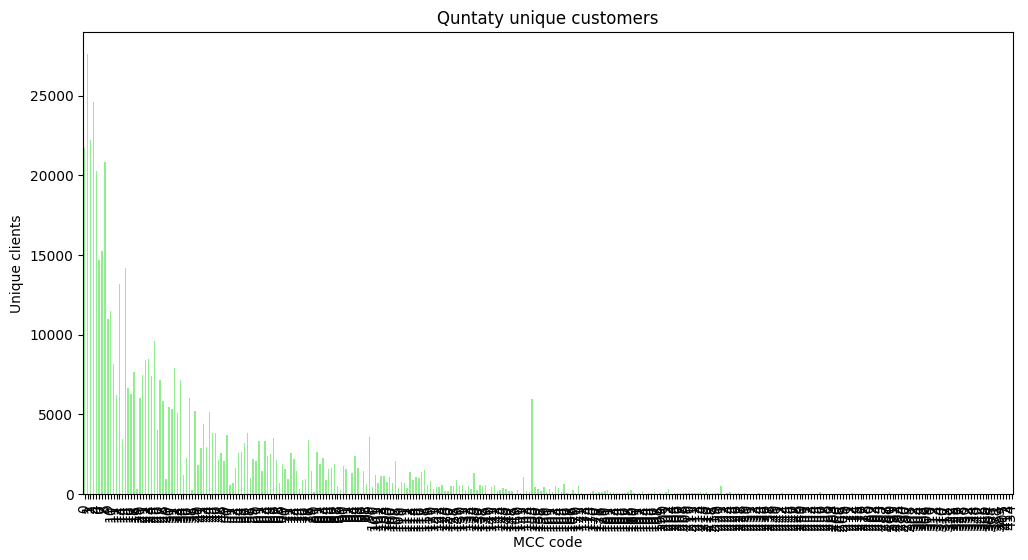

In [ ]:
import matplotlib.pyplot as plt

# Строим столбчатую диаграмму для количества уникальных клиентов по MCC кодам
plt.figure(figsize=(12, 6))
mcc_unique_customers.plot(kind='bar', color='lightgreen')

# Добавляем заголовки и подписи осей
plt.title('Quntaty unique customers')
plt.xlabel('MCC code')
plt.ylabel('Unique clients')

# Поворачиваем метки на оси X для лучшей читаемости
plt.xticks(rotation=90)

# Показываем диаграмму
plt.show()


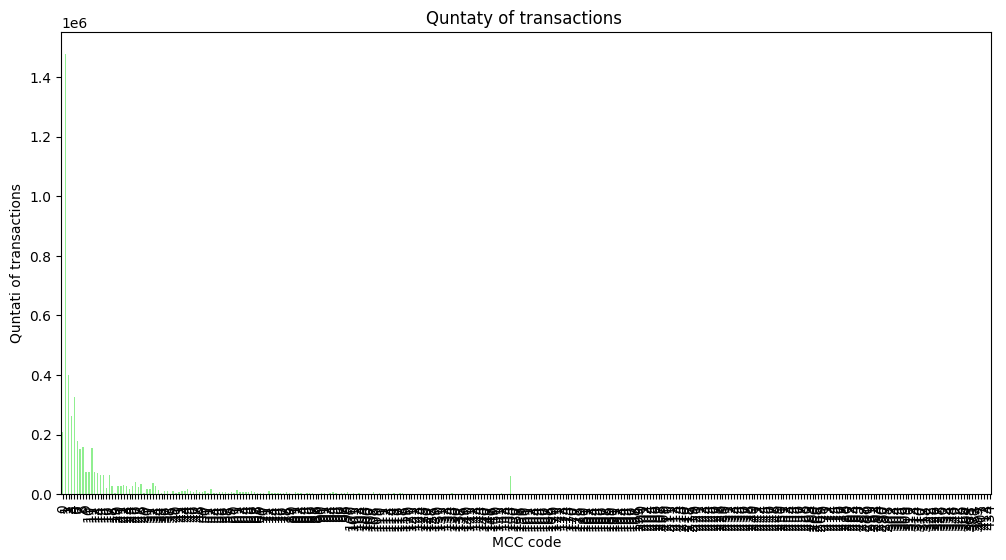

In [ ]:
import matplotlib.pyplot as plt

# Строим столбчатую диаграмму для количества транзакций по MCC кодам
plt.figure(figsize=(12, 6))
mcc_transaction_counts.plot(kind='bar', color='lightgreen')
plt.title('Quntaty of transactions ')
plt.xlabel('MCC code')
plt.ylabel('Quntati of transactions')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df['transaction_amt'] = df['transaction_amt'].abs()

In [ ]:
# Группируем данные по mcc_code и суммируем суммы транзакций
mcc_revenue = df.groupby('mcc_code')['transaction_amt'].sum()

# Выводим результат
print(mcc_revenue)


mcc_code
0      2.858836e+09
1      9.950404e+08
2      1.628794e+08
3      3.765337e+09
4      1.483118e+08
           ...     
389    2.590483e+04
407    1.543281e+04
412    8.704746e+02
413    1.657060e+04
434    1.103374e+04
Name: transaction_amt, Length: 320, dtype: float64


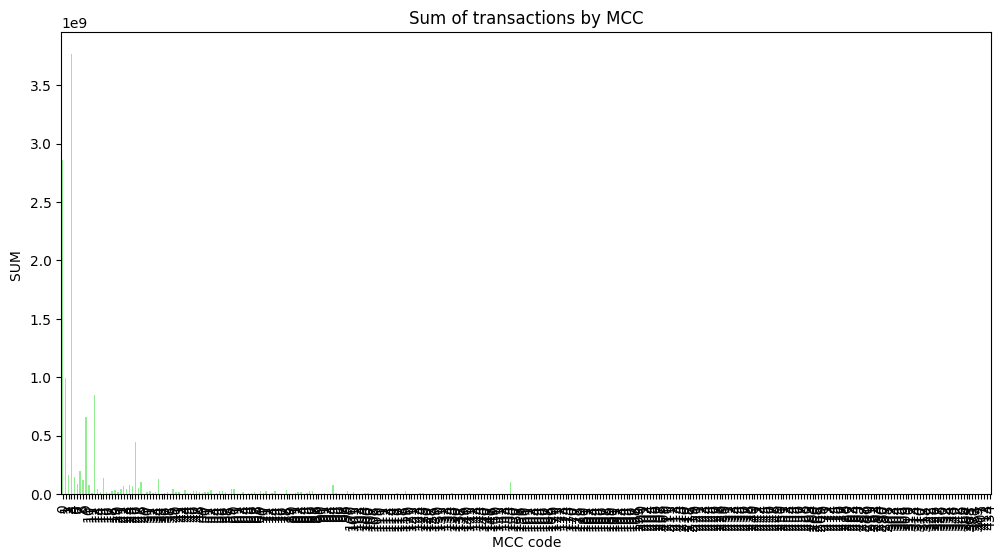

In [ ]:
import matplotlib.pyplot as plt

# Строим столбчатую диаграмму для суммы транзакций по MCC кодам
plt.figure(figsize=(12, 6))
mcc_revenue.plot(kind='bar', color='lightgreen')

# Добавляем заголовки и подписи осей
plt.title('Sum of transactions by MCC')
plt.xlabel('MCC code')
plt.ylabel('SUM ')

# Поворачиваем метки на оси X для лучшей читаемости
plt.xticks(rotation=90)

# Показываем диаграмму
plt.show()


начинаем тестировать что у нас происзодит с покупочками

In [ ]:
import datetime as dt

In [ ]:
PRESENT = dt.datetime(year=2021, month=10, day=7, hour=13, minute=14, second=31)
df['transaction_dttm'] = pd.to_datetime(df['transaction_dttm'],  format="%Y-%m-%d %H:%M:%S", errors='coerce')

In [ ]:
df = df.drop(4746086)

In [ ]:
# Преобразуем столбец с датой транзакции в формат datetime (если еще не преобразован)
df['transaction_dttm'] = pd.to_datetime(df['transaction_dttm'])

# Добавляем столбец с месяцем транзакции
df['transaction_month'] = df['transaction_dttm'].dt.to_period('M')  # Извлекаем месяц и год

# Группируем данные по mcc_code и transaction_month, суммируя transaction_amt
mcc_revenue_by_month = df.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().unstack(fill_value=0)

# Выводим результат
print(mcc_revenue_by_month)


transaction_month       2021-10       2021-11       2021-12       2022-01  \
mcc_code                                                                    
0                  1.672121e+07  5.860009e+07  1.325011e+08  1.298749e+08   
1                  5.565083e+06  1.869329e+07  4.386838e+07  4.436284e+07   
2                  8.964502e+05  2.882650e+06  6.595153e+06  6.862848e+06   
3                  2.005938e+07  7.156441e+07  1.541769e+08  1.354174e+08   
4                  8.948677e+05  2.504610e+06  5.137513e+06  6.751682e+06   
...                         ...           ...           ...           ...   
389                0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
407                0.000000e+00  0.000000e+00  0.000000e+00  1.543281e+04   
412                0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
413                0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
434                0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

<Figure size 1200x600 with 0 Axes>

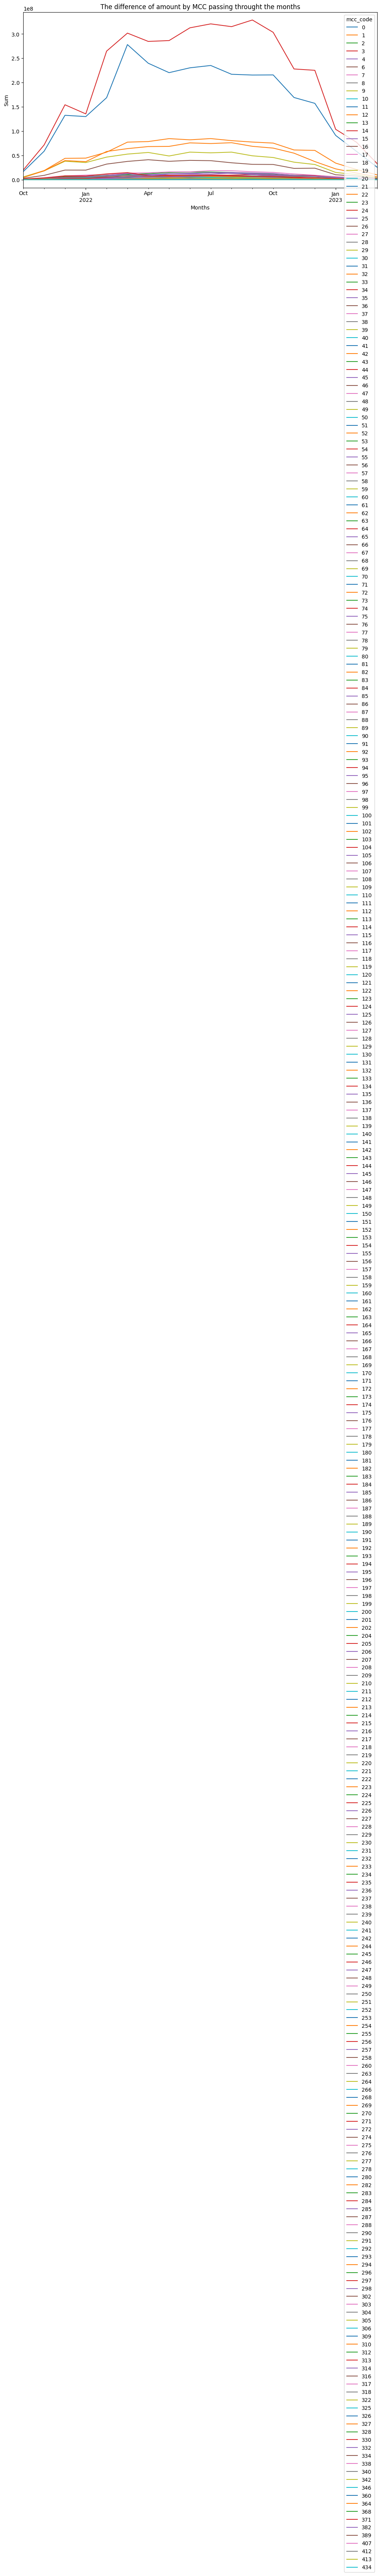

In [ ]:
import matplotlib.pyplot as plt

# Строим график изменения дохода по месяцам для всех MCC кодов
plt.figure(figsize=(12, 6))
mcc_revenue_by_month.T.plot(kind='line', figsize=(12, 6))

# Добавляем заголовки и подписи осей
plt.title('The difference of amount by MCC passing throught the months')
plt.xlabel('Months')
plt.ylabel('Sum')

# Показать диаграмму
plt.show()


я хочу чтобы он отсортировал клиентов по дате первой совершаемой покупки по месяцам
и для каждой такой группы  категории отсортировал как они меняли сумму своих покупок - транзакции  по mcc на протяжении всех месяцев

In [ ]:
# Преобразуем столбец с датами транзакций в формат datetime
df['transaction_dttm'] = pd.to_datetime(df['transaction_dttm'])

# Находим месяц первой покупки для каждого клиента
df['first_purchase_month'] = df.groupby('user_id')['transaction_dttm'].transform('min').dt.to_period('M')

# Сортируем клиентов по месяцу первой покупки
df_sorted_by_first_purchase = df.sort_values(by='first_purchase_month')


In [ ]:
df

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,transaction_month,first_purchase_date,first_purchase_month
0,3,3,1,183.883957,2022-01-28 12:05:33,2022-01,2022-01-28 12:05:33,2022-01
1,3,3,1,3206.437012,2022-01-28 12:52:30,2022-01,2022-01-28 12:05:33,2022-01
2,3,16,1,153866.890625,2022-02-16 14:45:56,2022-02,2022-01-28 12:05:33,2022-01
3,3,56,1,15144.601562,2022-03-09 19:58:29,2022-03,2022-01-28 12:05:33,2022-01
4,3,0,1,5297.908691,2022-03-12 18:11:31,2022-03,2022-01-28 12:05:33,2022-01
...,...,...,...,...,...,...,...,...
4746081,185472,4,1,58.957558,2022-07-12 15:34:24,2022-07,2022-03-22 17:43:12,2022-03
4746082,185472,10,1,388.796509,2022-07-12 17:33:35,2022-07,2022-03-22 17:43:12,2022-03
4746083,185472,4,1,220.704605,2022-07-12 19:45:24,2022-07,2022-03-22 17:43:12,2022-03
4746084,185472,24,1,1791.454102,2022-07-12 20:13:08,2022-07,2022-03-22 17:43:12,2022-03


In [ ]:
# Добавляем столбец с месяцем транзакции
df['transaction_month'] = df['transaction_dttm'].dt.to_period('M')

# Группируем данные по user_id, mcc_code и месяцу, суммируя суммы транзакций
mcc_purchases_by_month = df.groupby(['first_purchase_month', 'mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Сортируем данные по месяцу первой покупки и месяцу транзакции
mcc_purchases_by_month = mcc_purchases_by_month.sort_values(by=['first_purchase_month', 'transaction_month'])


In [ ]:
df

,user_id,mcc_code,currency_rk,transaction_amt,transaction_dttm,transaction_month,first_purchase_date,first_purchase_month
0,3,3,1,183.883957,2022-01-28 12:05:33,2022-01,2022-01-28 12:05:33,2022-01
1,3,3,1,3206.437012,2022-01-28 12:52:30,2022-01,2022-01-28 12:05:33,2022-01
2,3,16,1,153866.890625,2022-02-16 14:45:56,2022-02,2022-01-28 12:05:33,2022-01
3,3,56,1,15144.601562,2022-03-09 19:58:29,2022-03,2022-01-28 12:05:33,2022-01
4,3,0,1,5297.908691,2022-03-12 18:11:31,2022-03,2022-01-28 12:05:33,2022-01
...,...,...,...,...,...,...,...,...
4746081,185472,4,1,58.957558,2022-07-12 15:34:24,2022-07,2022-03-22 17:43:12,2022-03
4746082,185472,10,1,388.796509,2022-07-12 17:33:35,2022-07,2022-03-22 17:43:12,2022-03
4746083,185472,4,1,220.704605,2022-07-12 19:45:24,2022-07,2022-03-22 17:43:12,2022-03
4746084,185472,24,1,1791.454102,2022-07-12 20:13:08,2022-07,2022-03-22 17:43:12,2022-03


In [ ]:
# Подсчет количества уникальных значений в столбце 'first_purchase_month'
unique_first_purchase_month = df['first_purchase_month'].nunique()

# Получение всех уникальных значений в столбце
unique_values_first_purchase_month = df['first_purchase_month'].unique()

unique_first_purchase_month, unique_values_first_purchase_month


(18,
 <PeriodArray>
 ['2022-01', '2021-10', '2022-03', '2022-02', '2021-11', '2022-09', '2022-08',
  '2021-12', '2022-06', '2022-07', '2022-10', '2022-04', '2022-11', '2022-05',
  '2022-12', '2023-01', '2023-02', '2023-03']
 Length: 18, dtype: period[M])

In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-01']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)


      mcc_code transaction_month  transaction_amt
0            0           2022-01     1.873141e+07
1            0           2022-02     4.327829e+07
2            0           2022-03     5.615675e+07
3            0           2022-04     4.212204e+07
4            0           2022-05     3.594438e+07
...        ...               ...              ...
1488       360           2022-01     7.501259e+02
1489       364           2022-03     3.383993e+02
1490       389           2022-03     1.533313e+03
1491       389           2022-05     3.129860e+03
1492       413           2022-06     1.408270e+03

[1493 rows x 3 columns]


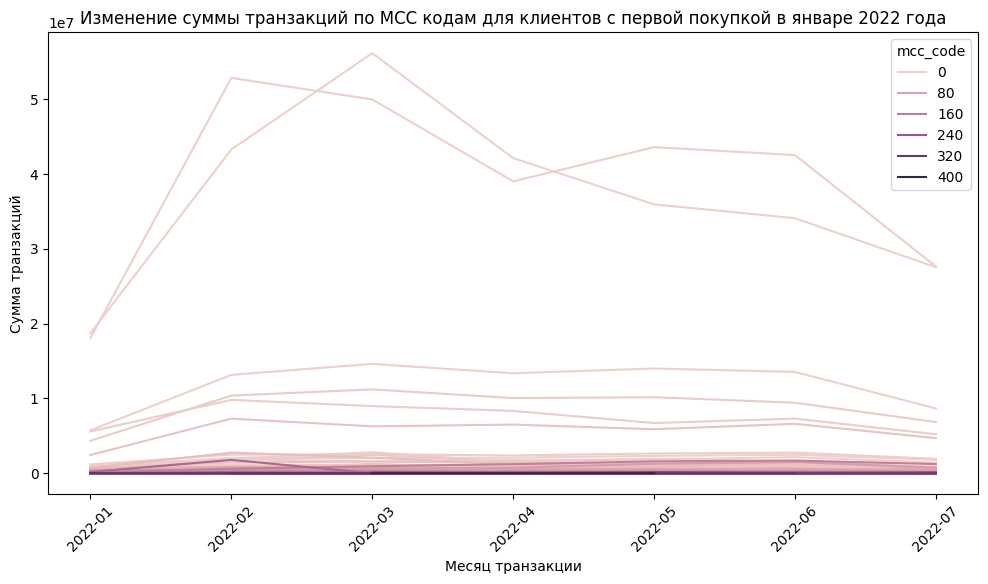

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Строим график изменения суммы транзакций по MCC кодам на протяжении месяцев
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month)

# Добавляем заголовки и подписи осей
plt.title('Изменение суммы транзакций по MCC кодам для клиентов с первой покупкой в январе 2022 года')
plt.xlabel('Месяц транзакции')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)

# Показываем график
plt.show()


<ipython-input-74-c87c44c2df65>:9: UserWarning: 
The palette list has fewer values (10) than needed (265) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month, palette=palette)


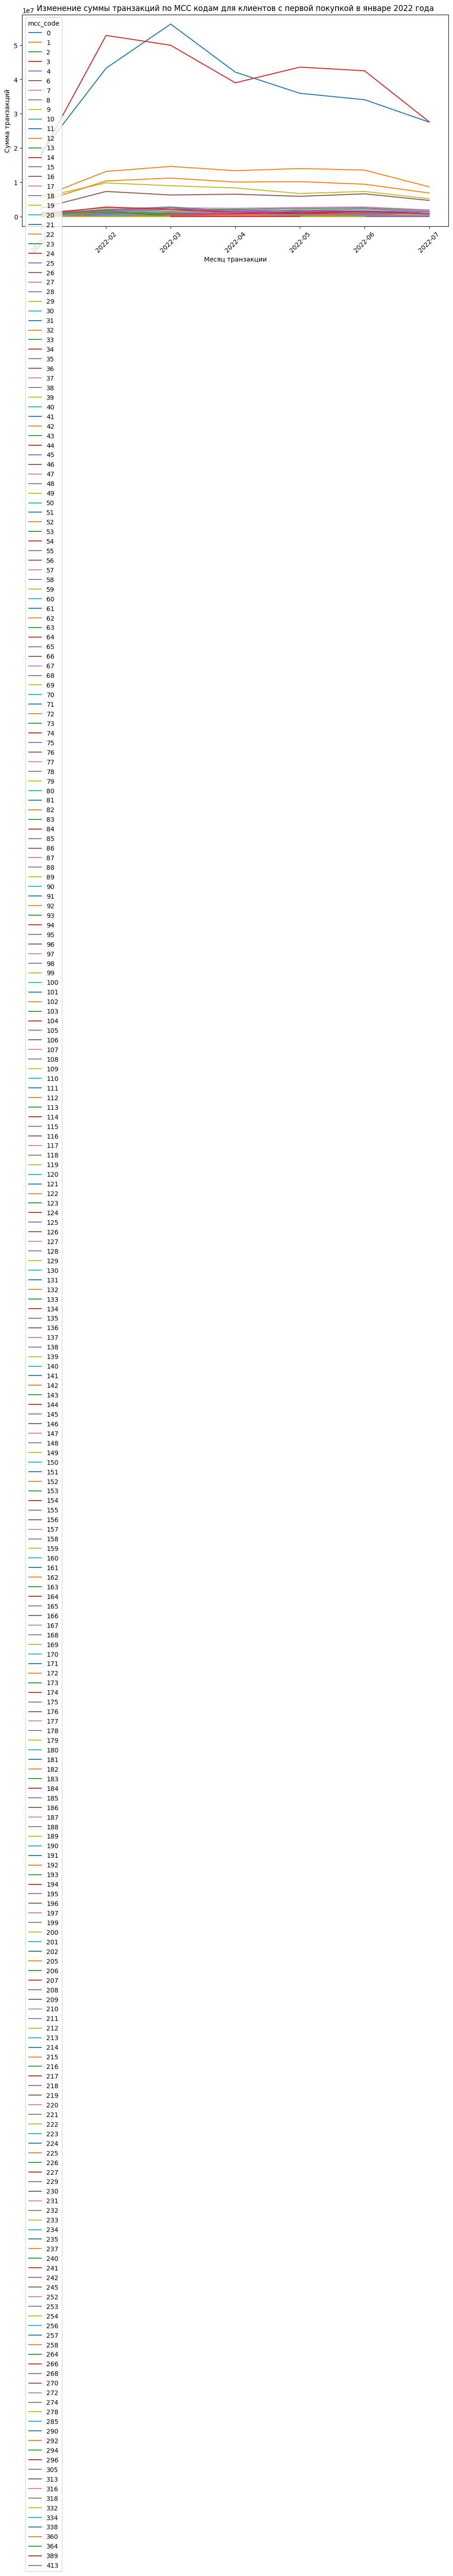

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установим более яркую цветовую палитру
palette = sns.color_palette("tab10")  # Можете использовать другие палитры, такие как "Set1", "Set2", "Spectral"

# Строим график изменения суммы транзакций по MCC кодам на протяжении месяцев
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month, palette=palette)

# Добавляем заголовки и подписи осей
plt.title('Изменение суммы транзакций по MCC кодам для клиентов с первой покупкой в январе 2022 года')
plt.xlabel('Месяц транзакции')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)

# Показываем график
plt.show()


In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-02']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

      mcc_code transaction_month  transaction_amt
0            0           2022-02     1.902532e+07
1            0           2022-03     5.549444e+07
2            0           2022-04     3.956080e+07
3            0           2022-05     3.691425e+07
4            0           2022-06     3.674902e+07
...        ...               ...              ...
1415       364           2022-04     3.711461e+02
1416       382           2022-07     1.088885e+03
1417       389           2022-04     1.430640e+03
1418       389           2022-05     3.403890e+03
1419       413           2022-05     2.135341e+03

[1420 rows x 3 columns]


<ipython-input-77-2bc90a44b3d1>:9: UserWarning: 
The palette list has fewer values (10) than needed (254) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month, palette=palette)


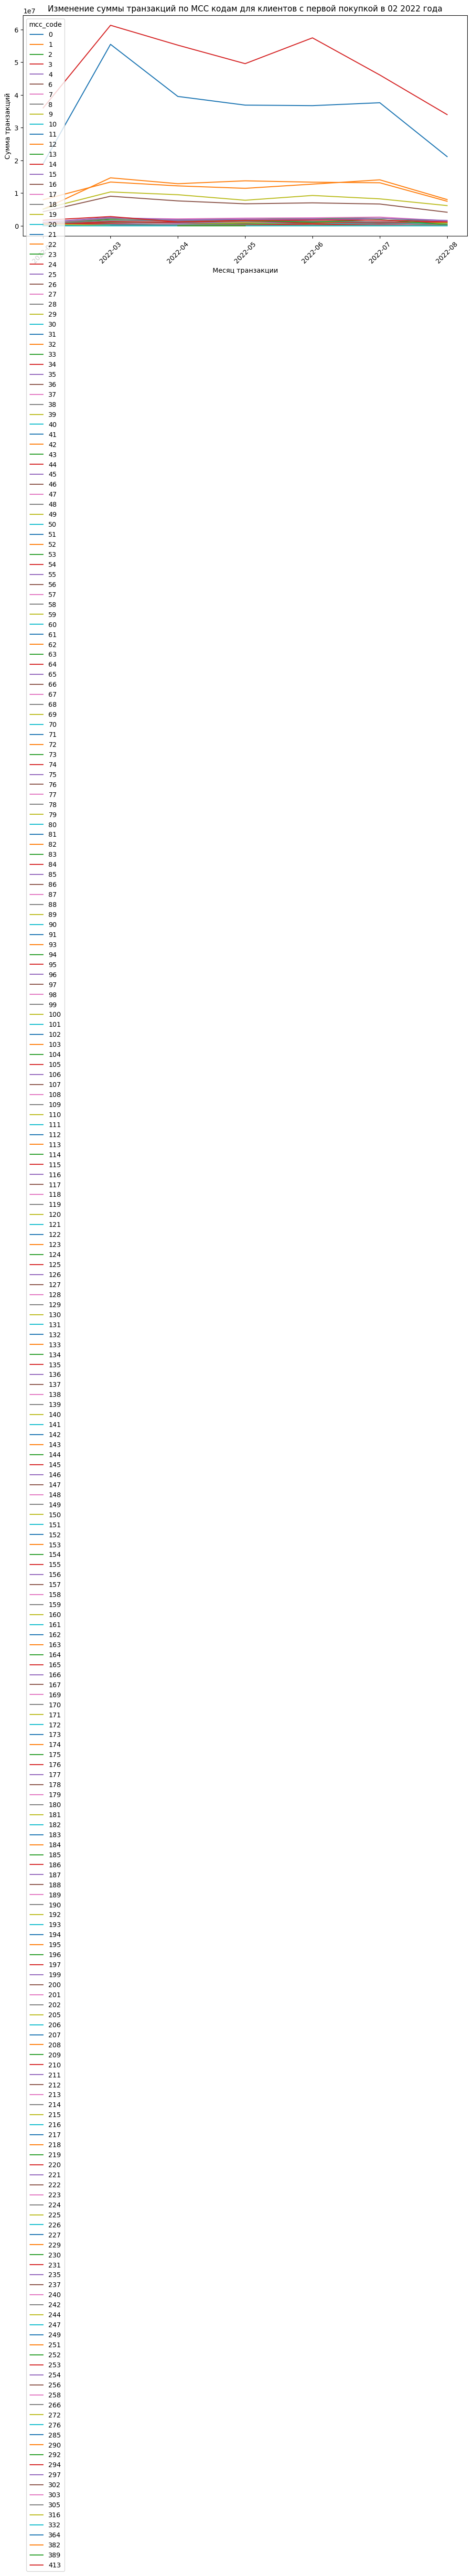

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установим более яркую цветовую палитру
palette = sns.color_palette("tab10")  # Можете использовать другие палитры, такие как "Set1", "Set2", "Spectral"

# Строим график изменения суммы транзакций по MCC кодам на протяжении месяцев
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month, palette=palette)

# Добавляем заголовки и подписи осей
plt.title('Изменение суммы транзакций по MCC кодам для клиентов с первой покупкой в 02 2022 года')
plt.xlabel('Месяц транзакции')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)

# Показываем график
plt.show()

In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-03']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

      mcc_code transaction_month  transaction_amt
0            0           2022-03     2.226265e+07
1            0           2022-04     3.827801e+07
2            0           2022-05     3.428986e+07
3            0           2022-06     3.275410e+07
4            0           2022-07     3.046752e+07
...        ...               ...              ...
1464       334           2022-06     2.193808e+04
1465       334           2022-07     4.470008e+04
1466       340           2022-04     2.662506e+02
1467       342           2022-06     1.832435e+02
1468       382           2022-05     1.159360e+04

[1469 rows x 3 columns]


<ipython-input-80-d1b5fd2ae1b8>:9: UserWarning: 
The palette list has fewer values (10) than needed (258) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month, palette=palette)


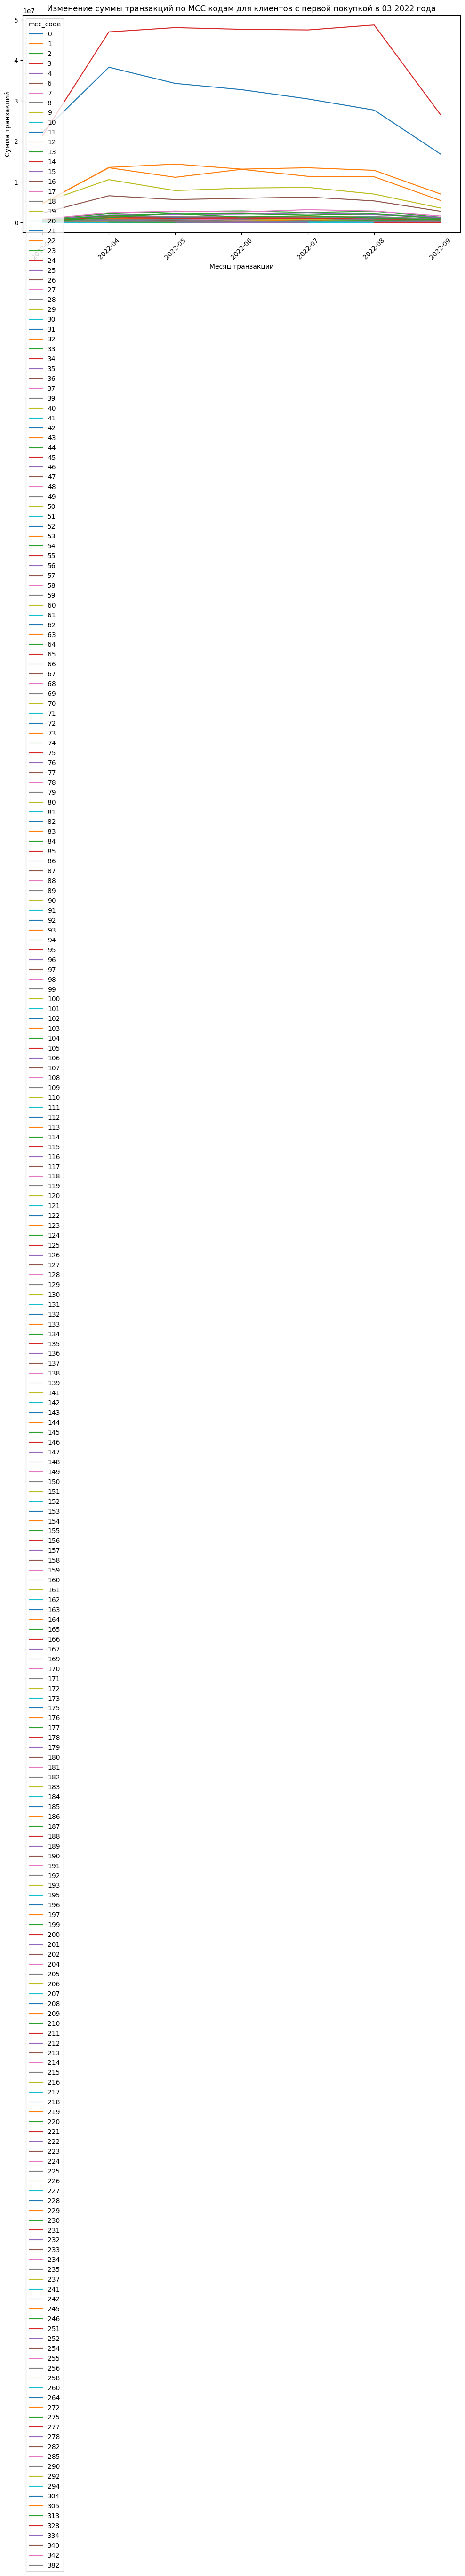

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установим более яркую цветовую палитру
palette = sns.color_palette("tab10")  # Можете использовать другие палитры, такие как "Set1", "Set2", "Spectral"

# Строим график изменения суммы транзакций по MCC кодам на протяжении месяцев
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month, palette=palette)

# Добавляем заголовки и подписи осей
plt.title('Изменение суммы транзакций по MCC кодам для клиентов с первой покупкой в 03 2022 года')
plt.xlabel('Месяц транзакции')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)

# Показываем график
plt.show()

In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-04']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

      mcc_code transaction_month  transaction_amt
0            0           2022-04     1.972993e+07
1            0           2022-05     3.640784e+07
2            0           2022-06     4.688979e+07
3            0           2022-07     4.072481e+07
4            0           2022-08     3.777069e+07
...        ...               ...              ...
1460       334           2022-08     1.877387e+04
1461       334           2022-09     4.554066e+01
1462       340           2022-10     1.038227e+02
1463       364           2022-07     3.058203e+02
1464       371           2022-07     2.737492e+04

[1465 rows x 3 columns]


<ipython-input-83-d1b5fd2ae1b8>:9: UserWarning: 
The palette list has fewer values (10) than needed (258) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month, palette=palette)


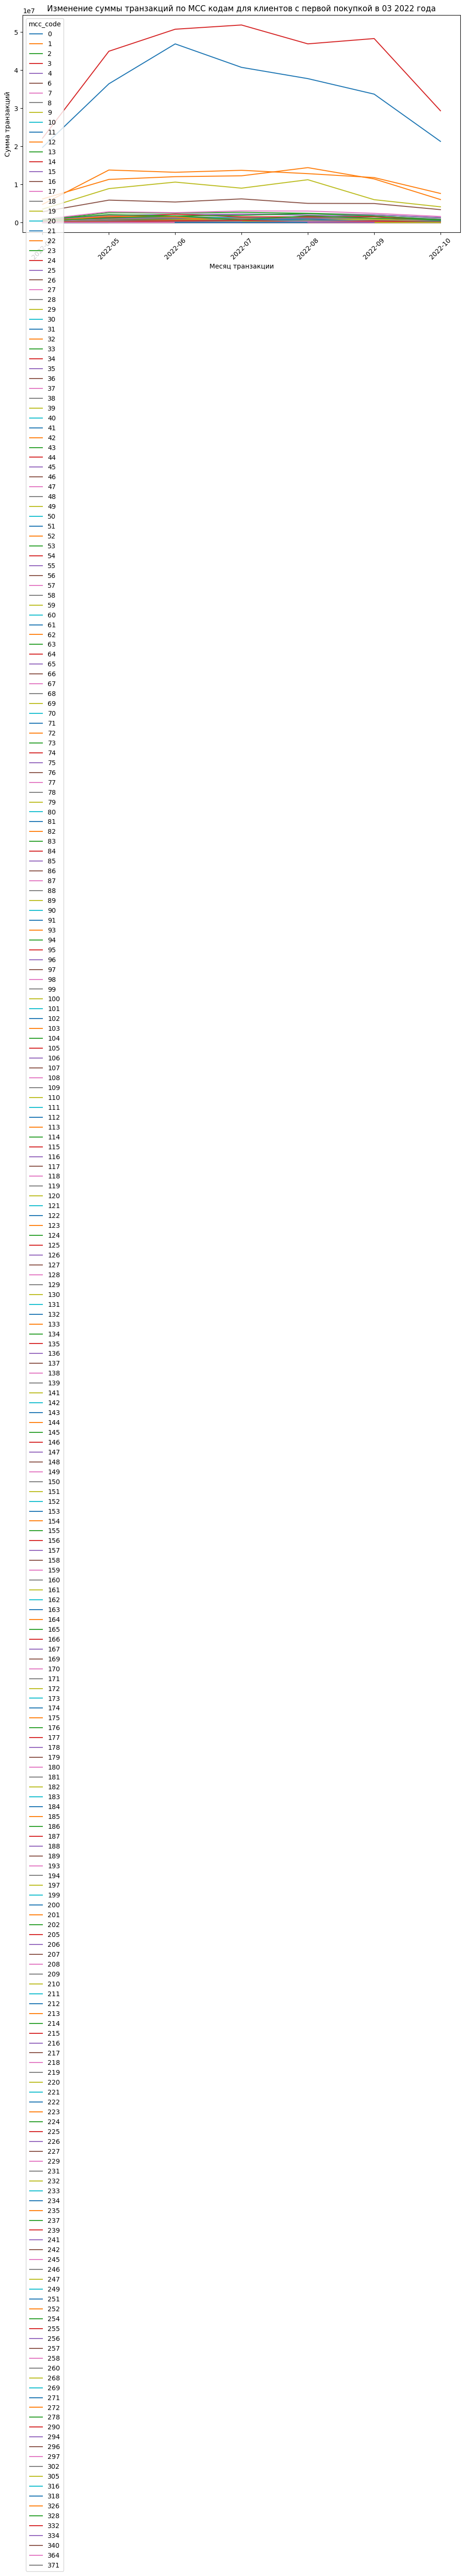

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установим более яркую цветовую палитру
palette = sns.color_palette("tab10")  # Можете использовать другие палитры, такие как "Set1", "Set2", "Spectral"

# Строим график изменения суммы транзакций по MCC кодам на протяжении месяцев
plt.figure(figsize=(12, 6))
sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month, palette=palette)

# Добавляем заголовки и подписи осей
plt.title('Изменение суммы транзакций по MCC кодам для клиентов с первой покупкой в 03 2022 года')
plt.xlabel('Месяц транзакции')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)

# Показываем график
plt.show()

In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-05']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

      mcc_code transaction_month  transaction_amt
0            0           2022-05     1.861876e+07
1            0           2022-06     3.923102e+07
2            0           2022-07     4.173859e+07
3            0           2022-08     3.853219e+07
4            0           2022-09     3.665892e+07
...        ...               ...              ...
1466       334           2022-08     2.585694e+02
1467       364           2022-11     3.064997e+02
1468       368           2022-06     8.788483e+02
1469       413           2022-08     8.701998e+03
1470       413           2022-11     1.219346e+03

[1471 rows x 3 columns]


In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-06']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

      mcc_code transaction_month  transaction_amt
0            0           2022-06     1.953552e+07
1            0           2022-07     3.544961e+07
2            0           2022-08     3.174348e+07
3            0           2022-09     3.105949e+07
4            0           2022-10     3.093725e+07
...        ...               ...              ...
1473       332           2022-11     1.948527e+03
1474       332           2022-12     1.846746e+03
1475       338           2022-08     1.512961e+02
1476       413           2022-12     2.732547e+03
1477       434           2022-11     1.103374e+04

[1478 rows x 3 columns]


In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-07']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

      mcc_code transaction_month  transaction_amt
0            0           2022-07     2.151791e+07
1            0           2022-08     4.024298e+07
2            0           2022-09     3.628163e+07
3            0           2022-10     4.040137e+07
4            0           2022-11     3.454551e+07
...        ...               ...              ...
1435       316           2022-07     1.660146e+03
1436       338           2022-11     7.586935e+01
1437       346           2022-11     4.794461e+03
1438       364           2022-07     2.951877e+02
1439       364           2022-11     2.913806e+02

[1440 rows x 3 columns]


In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-08']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

      mcc_code transaction_month  transaction_amt
0            0           2022-08     1.978766e+07
1            0           2022-09     3.905566e+07
2            0           2022-10     3.943317e+07
3            0           2022-11     3.818166e+07
4            0           2022-12     3.772819e+07
...        ...               ...              ...
1451       328           2022-10     1.604527e+05
1452       328           2022-11     5.561257e+02
1453       342           2022-08     2.397481e+04
1454       364           2022-12     6.685577e+02
1455       382           2023-02     3.755457e+02

[1456 rows x 3 columns]


In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-09']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

      mcc_code transaction_month  transaction_amt
0            0           2022-09     2.174498e+07
1            0           2022-10     3.888911e+07
2            0           2022-11     4.048667e+07
3            0           2022-12     5.268728e+07
4            0           2023-01     3.227027e+07
...        ...               ...              ...
1456       326           2022-10     5.828256e+03
1457       326           2022-11     2.741712e+03
1458       327           2022-10     6.738751e+03
1459       327           2022-11     5.783438e+03
1460       368           2023-01     5.726914e+02

[1461 rows x 3 columns]


In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-10']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

     mcc_code transaction_month  transaction_amt
0           0           2022-10     7.986133e+06
1           0           2022-11     8.971269e+06
2           0           2022-12     1.001806e+07
3           0           2023-01     5.277339e+06
4           0           2023-02     7.285193e+06
..        ...               ...              ...
746       256           2023-01     9.821156e+01
747       256           2023-02     1.139761e+03
748       263           2022-10     2.441560e+04
749       294           2023-01     5.428939e+02
750       294           2023-02     2.030472e+03

[751 rows x 3 columns]


In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-11']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

     mcc_code transaction_month  transaction_amt
0           0           2022-11     2.317572e+06
1           0           2022-12     9.580300e+05
2           0           2023-01     1.229385e+06
3           0           2023-02     1.040302e+06
4           0           2023-03     1.240389e+06
..        ...               ...              ...
365       221           2023-02     2.560858e+02
366       223           2022-12     1.498244e+02
367       236           2023-02     2.361888e+02
368       266           2023-01     8.542034e+02
369       413           2022-11     3.730998e+02

[370 rows x 3 columns]


In [ ]:
# Фильтруем клиентов с первой покупкой в январе 2022 года
filtered_data = df[df['first_purchase_month'] == '2022-12']

# Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

# Проверяем результат
print(mcc_revenue_by_month)

     mcc_code transaction_month  transaction_amt
0           0           2022-12     1.554370e+05
1           0           2023-01     7.120088e+06
2           0           2023-02     6.192453e+05
3           0           2023-03     3.052866e+05
4           1           2022-12     1.359729e+05
..        ...               ...              ...
222       155           2023-02     7.928893e+03
223       155           2023-03     3.741378e+03
224       156           2022-12     1.406856e+03
225       209           2022-12     4.575205e+02
226       216           2023-01     4.531348e+02

[227 rows x 3 columns]


<ipython-input-84-d1888788ec05>:21: UserWarning: 
The palette list has fewer values (18) than needed (265) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month,
<ipython-input-84-d1888788ec05>:21: UserWarning: 
The palette list has fewer values (18) than needed (280) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month,
<ipython-input-84-d1888788ec05>:21: UserWarning: 
The palette list has fewer values (18) than needed (258) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month,
<ipython-input-84-d1888788ec05>:21: UserWarning: 
The palette list has fewer values (18) than needed (254) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='transaction_

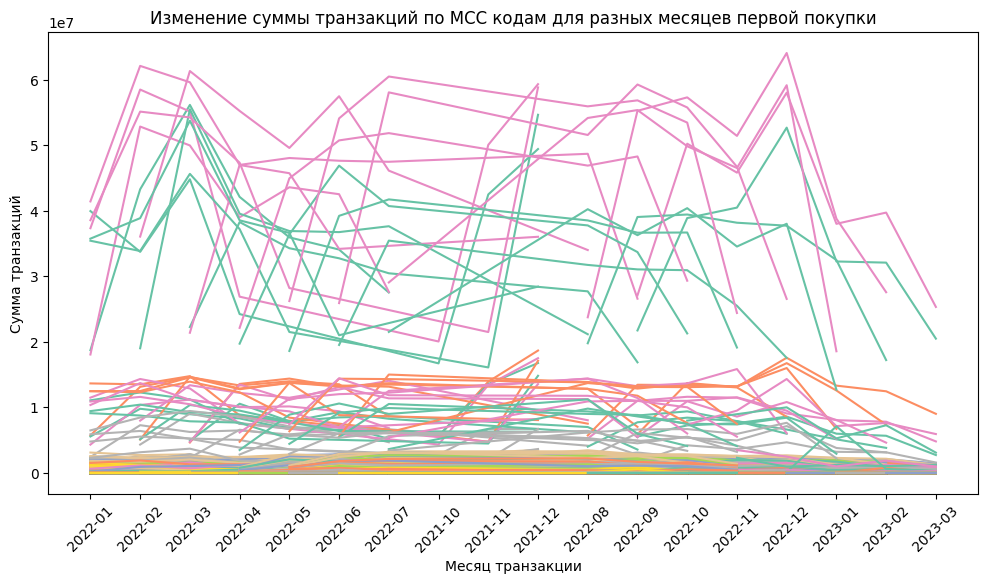

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Определим диапазон месяцев первой покупки
first_purchase_months = df['first_purchase_month'].unique()

plt.figure(figsize=(12, 6))

# Используем палитру для цветов линий
palette = sns.color_palette("Set2", n_colors=len(first_purchase_months))

# Цикл по каждому месяцу первой покупки
for idx, month in enumerate(first_purchase_months):
    # Фильтруем данные для клиентов с первой покупкой в конкретный месяц
    filtered_data = df[df['first_purchase_month'] == month]

    # Группируем данные по MCC кодам и месяцу транзакции, суммируя суммы транзакций
    mcc_revenue_by_month = filtered_data.groupby(['mcc_code', 'transaction_month'])['transaction_amt'].sum().reset_index()

    # Строим линию для каждого месяца первой покупки
    sns.lineplot(x='transaction_month', y='transaction_amt', hue='mcc_code', data=mcc_revenue_by_month,
                 palette=palette, legend=None)

# Добавляем заголовки и подписи осей
plt.title('Изменение суммы транзакций по MCC кодам для разных месяцев первой покупки')
plt.xlabel('Месяц транзакции')
plt.ylabel('Сумма транзакций')
plt.xticks(rotation=45)

# Показываем график
plt.show()
